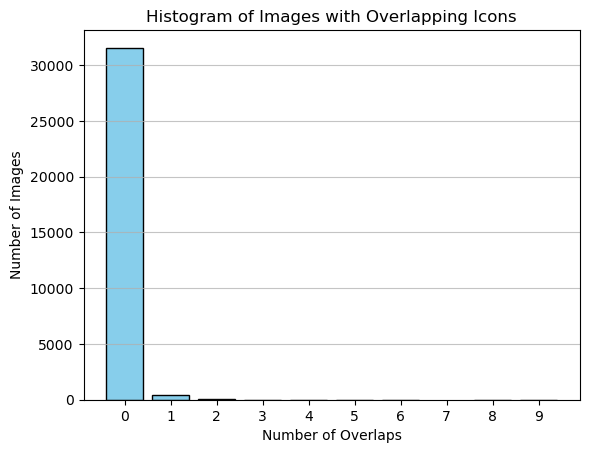

In [3]:
import json
import os
import matplotlib.pyplot as plt
from collections import Counter

def check_overlap(bndbox1, bndbox2):
    
    if (bndbox1['xmax'] <= bndbox2['xmin'] or
        bndbox1['xmin'] >= bndbox2['xmax'] or
        bndbox1['ymax'] <= bndbox2['ymin'] or
        bndbox1['ymin'] >= bndbox2['ymax']):
        return False
    return True

def count_overlaps(objects):
    
    overlap_count = 0
    for i in range(len(objects)):
        for j in range(i + 1, len(objects)):
            if check_overlap(objects[i]['bndbox'], objects[j]['bndbox']):
                overlap_count += 1
    return overlap_count

def process_json_files(json_dir):
    overlap_counts = Counter()
    json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]
    
    for json_file in json_files:
        file_path = os.path.join(json_dir, json_file)
        try:
            with open(file_path, 'r') as f:
                data = json.load(f)
                objects = data.get('outputs', {}).get('object', [])
                num_overlaps = count_overlaps(objects)
                overlap_counts[num_overlaps] += 1
        except Exception as e:
            print(f"Error processing file {json_file}: {e}")
    
    return overlap_counts

def plot_histogram(overlap_counts):
    overlaps = list(overlap_counts.keys())
    frequencies = list(overlap_counts.values())
    
    plt.bar(overlaps, frequencies, color='skyblue', edgecolor='black')
    plt.xlabel('Number of Overlaps')
    plt.ylabel('Number of Images')
    plt.title('Histogram of Images with Overlapping Icons')
    plt.xticks(range(max(overlaps) + 1))
    plt.grid(axis='y', alpha=0.75)
    plt.show()

if __name__ == "__main__":
    json_dir = r"F:\prism\destination_json"  
    overlap_counts = process_json_files(json_dir)
    plot_histogram(overlap_counts)


In [4]:
overlap_counts.keys()

dict_keys([0, 1, 3, 2, 8, 9, 5, 6, 4])

In [5]:
overlap_counts.values()

dict_values([31554, 402, 5, 39, 2, 2, 3, 2, 5])

In [ ]:
s